In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [19]:
df = pd.read_csv("C:/Users/shubh/Downloads/Swiggy_Data_Analysis/Swiggy Bangalore Outlet Details.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [21]:
# top 5 data
df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [22]:
# last 5 data
df.tail()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,₹ 219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,₹ 600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,₹ 193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,₹ 200
117,Mani's Dum Biryani,"Andhra, Biryani","1st Block, Koramangala",4.2,₹ 400


In [23]:
df.describe()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
count,118,118,118,118,118
unique,115,79,65,13,30
top,La Pino'z Pizza,North Indian,"BTM, BTM",4.1,₹ 300
freq,2,12,13,30,16


### Data Cleaning

In [24]:
df.isnull()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
113,False,False,False,False,False
114,False,False,False,False,False
115,False,False,False,False,False
116,False,False,False,False,False


In [25]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [26]:
df['Cost_for_Two'] = df['Cost_for_Two'].str.replace('₹', '').str.replace(',', '').astype(float)

In [27]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_Name     118 non-null    object 
 1   Cuisine       118 non-null    object 
 2   Location      118 non-null    object 
 3   Rating        117 non-null    float64
 4   Cost_for_Two  118 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.7+ KB


,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150.0
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400.0
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126.0
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400.0
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450.0


In [28]:
sea.set(style="whitegrid")

In [29]:
top_rated = df.sort_values(by="Rating", ascending=False).head(10)

In [30]:
from collections import Counter
cuisine_list = [c.strip() for cuisines in df["Cuisine"] for c in cuisines.split(",")]
cuisine_counts = Counter(cuisine_list)
top_cuisines = pd.DataFrame(cuisine_counts.items(), columns=["Cuisine", "Count"]).sort_values(by="Count", ascending=False)

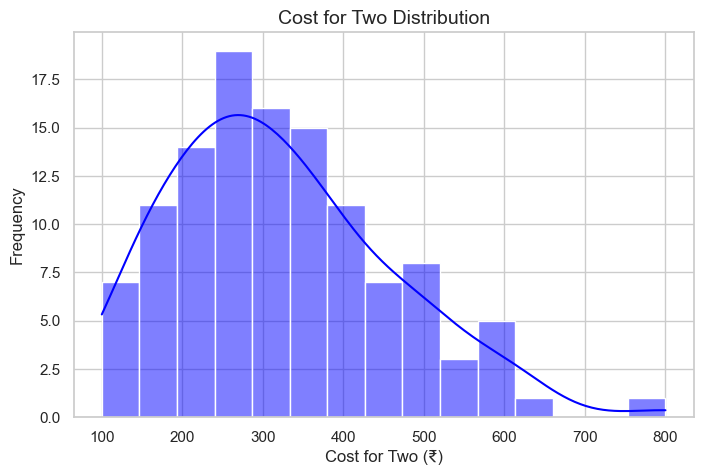

In [31]:
plt.figure(figsize=(8, 5))
sea.histplot(df["Cost_for_Two"], bins=15, kde=True, color="blue")
plt.title("Cost for Two Distribution", fontsize=14)
plt.xlabel("Cost for Two (₹)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

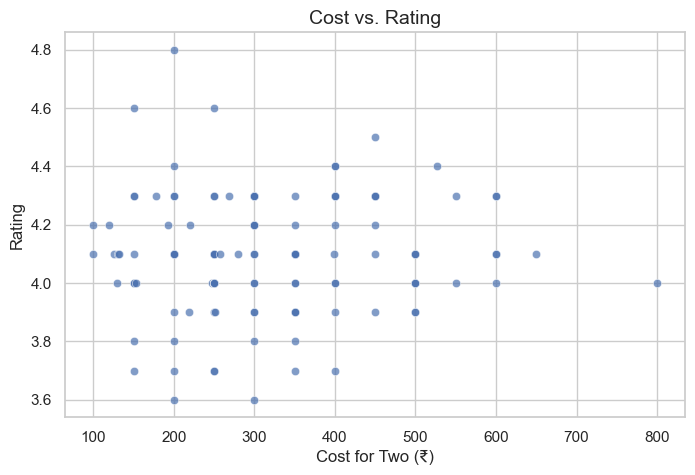

In [33]:
# Relationship between Cost and Rating
plt.figure(figsize=(8, 5))
sea.scatterplot(x=df["Cost_for_Two"], y=df["Rating"], alpha=0.7)
plt.title("Cost vs. Rating", fontsize=14)
plt.xlabel("Cost for Two (₹)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.show()

In [34]:
# Popular restaurant locations
top_locations = df["Location"].value_counts().head(10)

top_rated, top_cuisines.head(10), top_locations

(                             Shop_Name  \
 78                  Khichdi Experiment   
 82                   Natural Ice Cream   
 94              Corner House Ice Cream   
 80                         Chinese Bae   
 1                        Mumbai Tiffin   
 3                              Al Daaz   
 48                         China Pearl   
 111                            Bowl 99   
 43                         Cream Stone   
 20   Just Bake - Cakes & confectioners   
 
                                                Cuisine  \
 78                     Home Food, Healthy Food, Indian   
 82                                           Ice Cream   
 94                                 Ice Cream, Desserts   
 80                                       Chinese, Thai   
 1               North Indian, Home Food, Thalis, Combo   
 3    American, Arabian, Chinese, Desserts, Fast Foo...   
 48                                      Chinese, Asian   
 111                         North Indian, South Indi

In [43]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.1 MB 6.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 6.0 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 5.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 5.8 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 5.8 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 5.5 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.1 MB 5.4 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   - -----

In [44]:
from sklearn.cluster import KMeans
import numpy as np

In [45]:
# Cuisine-based Pricing Trends
cuisine_avg_cost = []
for cuisine, count in cuisine_counts.items():
    avg_cost = df[df["Cuisine"].str.contains(cuisine, case=False, na=False)]["Cost_for_Two"].mean()
    cuisine_avg_cost.append((cuisine, avg_cost))

cuisine_avg_cost_df = pd.DataFrame(cuisine_avg_cost, columns=["Cuisine", "Avg_Cost"]).sort_values(by="Avg_Cost", ascending=False)

C:\Users\shubh\AppData\Local\Temp\ipykernel_14740\270141464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(data=cuisine_avg_cost_df.head(10), x="Avg_Cost", y="Cuisine", palette="coolwarm")


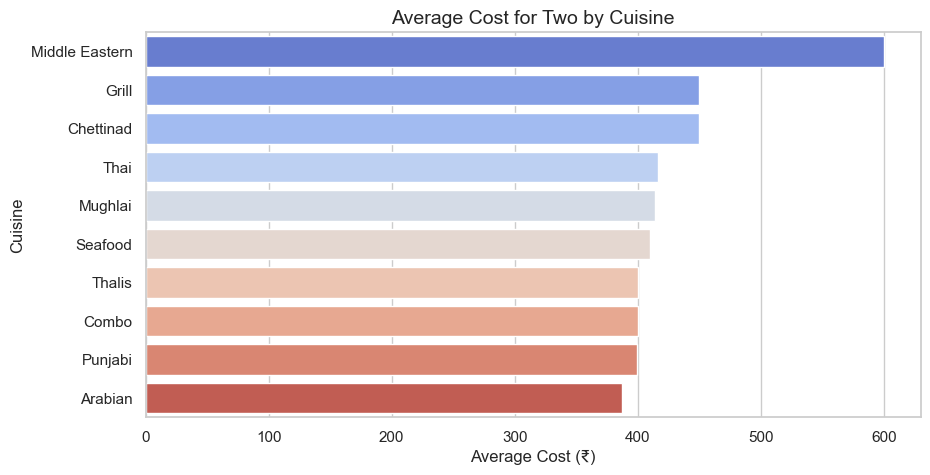

In [46]:
# Plot cuisine-based pricing trends
plt.figure(figsize=(10, 5))
sea.barplot(data=cuisine_avg_cost_df.head(10), x="Avg_Cost", y="Cuisine", palette="coolwarm")
plt.title("Average Cost for Two by Cuisine", fontsize=14)
plt.xlabel("Average Cost (₹)", fontsize=12)
plt.ylabel("Cuisine", fontsize=12)
plt.show()

In [47]:
# Clustering of Restaurant Ratings and Cost
cluster_data = df[["Cost_for_Two", "Rating"]].dropna()

In [48]:
# Using K-Means with 3 clusters (Low, Medium, High cost restaurants)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_data["Cluster"] = kmeans.fit_predict(cluster_data)

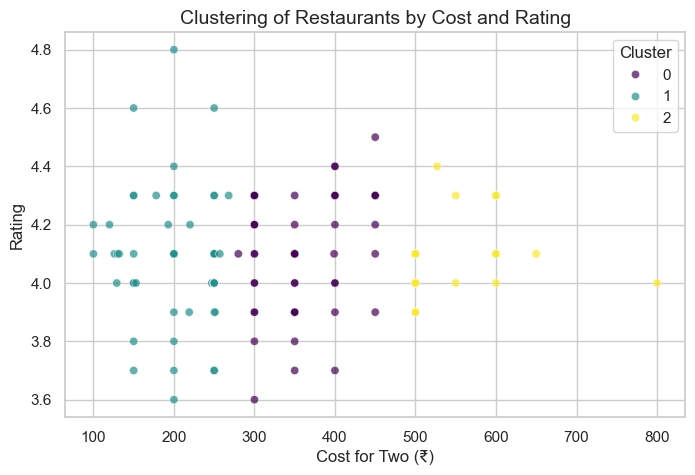

In [49]:
# Plot clustering results
plt.figure(figsize=(8, 5))
sea.scatterplot(data=cluster_data, x="Cost_for_Two", y="Rating", hue=cluster_data["Cluster"], palette="viridis", alpha=0.7)
plt.title("Clustering of Restaurants by Cost and Rating", fontsize=14)
plt.xlabel("Cost for Two (₹)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.legend(title="Cluster")
plt.show()

In [50]:
cuisine_avg_cost_df.head(10)

,Cuisine,Avg_Cost
47,Middle Eastern,600.000000
41,Grill,450.000000
44,Chettinad,450.000000
14,Thai,416.666667
13,Mughlai,414.142857
20,Seafood,410.222222
3,Thalis,400.000000
4,Combo,400.000000
38,Punjabi,399.500000
10,Arabian,387.500000
